In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [74]:
digits = tf.keras.datasets.mnist.load_data()

In [75]:
digits_a, digits_b = digits

In [76]:
digits_X, digits_y = digits_b
len(digits_X)

10000

In [77]:
digits_X = np.array(digits_X)
digits_y = np.array(digits_y)

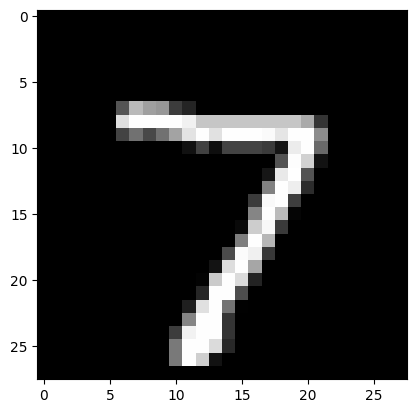

In [78]:
plt.imshow(digits_X[0], cmap="gray")

In [79]:
fashion = tf.keras.datasets.fashion_mnist.load_data()

In [80]:
fashion_class_name = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [81]:
fashion_a, fashion_b = fashion

In [82]:
fashion_X, fashion_y = fashion_a
len(fashion_X)

60000

In [83]:
fashion_X = np.array(fashion_X)
fashion_y = np.array(fashion_y)

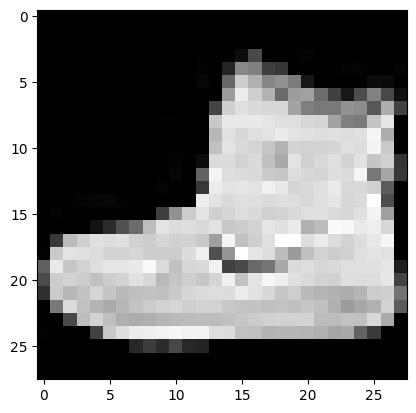

In [84]:
plt.imshow(fashion_X[0], cmap="gray")

In [85]:
np.random.seed(42)
idx_L = np.random.randint(0, len(fashion_X), len(fashion_X) * 2)
idx_R = np.random.randint(0, len(fashion_X), len(fashion_X) * 2)
idx_M = np.random.randint(0, len(digits_X), len(fashion_X) * 2)

In [86]:
L_X, L_y = fashion_X[idx_L], fashion_y[idx_L]
M_X, M_y = digits_X[idx_M], digits_y[idx_M]
R_X, R_y = fashion_X[idx_R], fashion_y[idx_R]

In [87]:
from tensorflow.keras.utils import to_categorical

X = np.concatenate([L_X, M_X, R_X], axis=2)
y = to_categorical(np.stack(L_y * (M_y % 2 == 0) + R_y * (M_y % 2 != 0)))

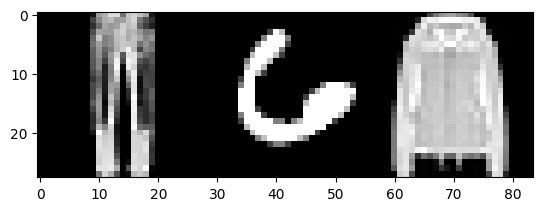

In [88]:
plt.imshow(X[0], cmap="gray")

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

In [90]:
from tensorflow.keras import layers, models, losses
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2

model = models.Sequential()
model.add(
    layers.Conv2D(
        32, (3, 3), padding="same", activation="relu", input_shape=(28, 84, 1)
    )
)
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=l2(0.01), activation="relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, kernel_regularizer=l2(0.01), activation="relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, kernel_regularizer=l2(0.01), activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


sgd = SGD(learning_rate=0.0008, momentum=0.95, nesterov=True)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [91]:
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid)
)

Epoch 1/20
2625/2625 [==============================] - 10s 4ms/step - loss: 5.0906 - accuracy: 0.5267 - val_loss: 2.1897 - val_accuracy: 0.7646
Epoch 2/20
2625/2625 [==============================] - 9s 4ms/step - loss: 1.4336 - accuracy: 0.7810 - val_loss: 0.9557 - val_accuracy: 0.7990
Epoch 3/20
2625/2625 [==============================] - 10s 4ms/step - loss: 0.7760 - accuracy: 0.8260 - val_loss: 0.6100 - val_accuracy: 0.8539
Epoch 4/20
2625/2625 [==============================] - 11s 4ms/step - loss: 0.6203 - accuracy: 0.8469 - val_loss: 0.5592 - val_accuracy: 0.8609
Epoch 5/20
2625/2625 [==============================] - 10s 4ms/step - loss: 0.5635 - accuracy: 0.8598 - val_loss: 0.5169 - val_accuracy: 0.8745
Epoch 6/20
2625/2625 [==============================] - 11s 4ms/step - loss: 0.5332 - accuracy: 0.8682 - val_loss: 0.5079 - val_accuracy: 0.8784
Epoch 7/20
2625/2625 [==============================] - 11s 4ms/step - loss: 0.5128 - accuracy: 0.8756 - val_loss: 0.4994 - val_acc

In [96]:
y_pred = model.predict(X_train)
onehot_pred = np.argmax(y_pred, axis=1)
onehot_test = np.argmax(y_train, axis=1)

np.mean(onehot_pred == onehot_test) * 100

2625/2625 [==============================] - 4s 2ms/step


93.45952380952382

In [97]:
y_pred = model.predict(X_test)
onehot_pred = np.argmax(y_pred, axis=1)
onehot_test = np.argmax(y_test, axis=1)

np.mean(onehot_pred == onehot_test) * 100

563/563 [==============================] - 1s 1ms/step


90.65555555555555

'Bag'

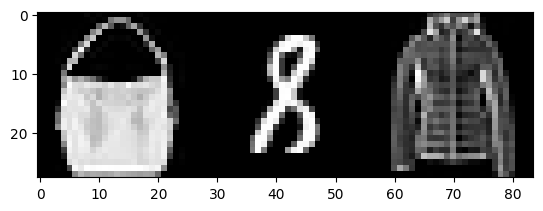

In [99]:
plt.imshow(X_test[0], cmap="gray")
fashion_class_name[np.argmax(y_pred[0])]

'Trouser'

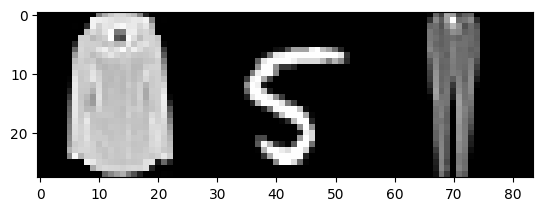

In [100]:
plt.imshow(X_test[1], cmap="gray")
fashion_class_name[np.argmax(y_pred[1])]

'T-shirt/top'

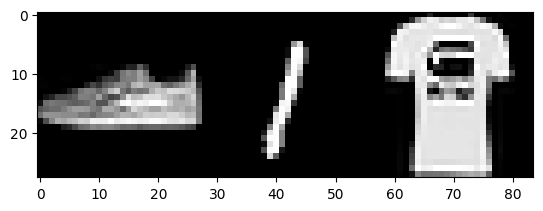

In [101]:
plt.imshow(X_test[2], cmap="gray")
fashion_class_name[np.argmax(y_pred[2])]